Importing Required Packages

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Import dataset

In [4]:
df = pd.read_csv("C:/Users/KUMARAGURU/OneDrive/Documents/Mall_Customers.csv")

Print first 5 values in the dataset

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Checking null values

In [6]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Correcting the Column name

In [7]:
df=df.rename(columns={'Genre':'Gender'})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Describe the dataset

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Scatter Plot

<AxesSubplot: xlabel='Age', ylabel='Spending Score (1-100)'>

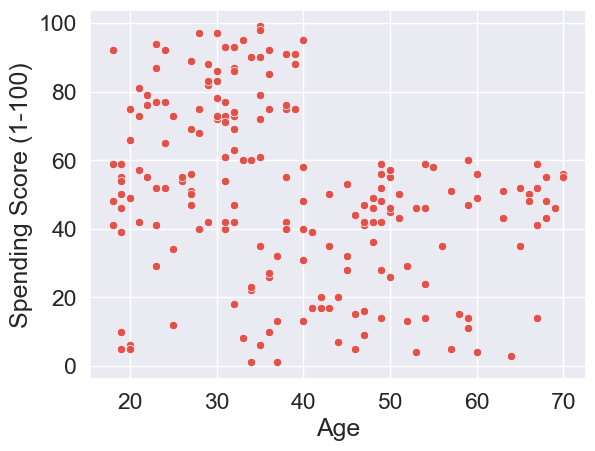

In [9]:
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df)

Performing Linear Regression

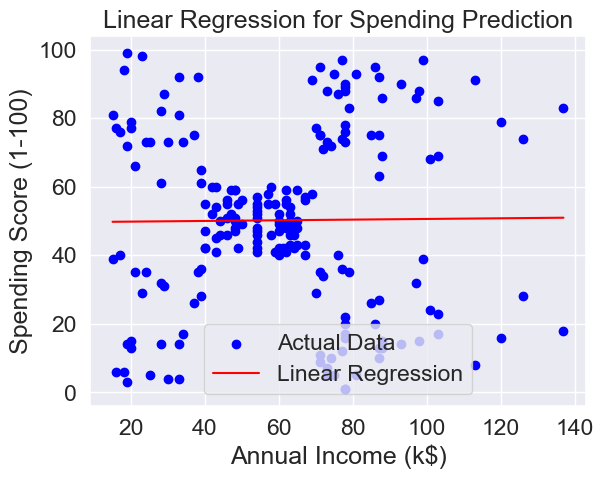

In [10]:
X = df[['Annual Income (k$)']]
y = df['Spending Score (1-100)']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.title('Linear Regression for Spending Prediction')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Performing Moving Average

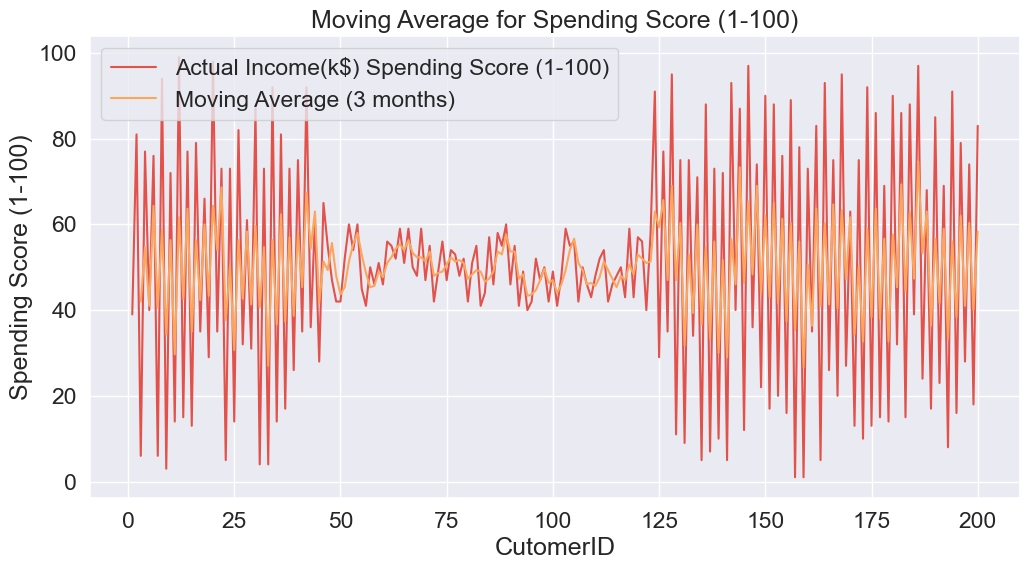

In [11]:
feature = 'Spending Score (1-100)'
window_size = 3
df['Moving_Average'] = df[feature].rolling(window=window_size).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['CustomerID'], df[feature], label='Actual Income(k$) ' + feature)
plt.plot(df['CustomerID'], df['Moving_Average'], label='Moving Average (' + str(window_size) + ' months)')
plt.xlabel('CutomerID')
plt.ylabel(feature)
plt.title('Moving Average for ' + feature)
plt.legend()
plt.grid(True)
plt.show()

Performing Principal Component Analysis

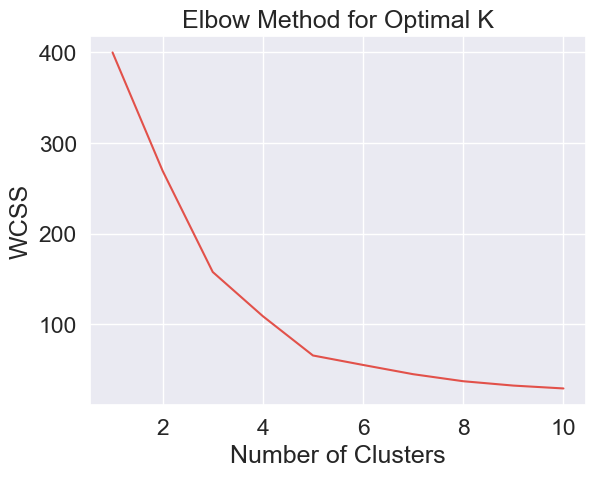

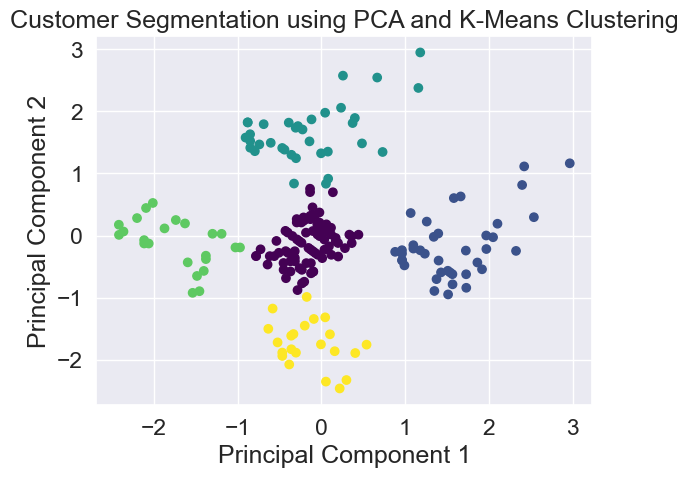

In [15]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0,)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_pca)
df['Cluster'] = cluster_labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation using PCA and K-Means Clustering')
plt.show()

Performing LSTM

In [24]:
feature = 'Spending Score (1-100)'
data = df[[feature]]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
train_size = int(len(data) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]
def create_sequences(data, sequence_length):
   X, y = [], []
   for i in range(len(data) - sequence_length):
      X.append(data[i:i+sequence_length])
      y.append(data[i+sequence_length])
   return np.array(X), np.array(y)
sequence_length = 10 # Adjust this as needed
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

Epoch 1/15
5/5 [==============================] - 6s 14ms/step - loss: 0.2308
Epoch 2/15
5/5 [==============================] - 0s 17ms/step - loss: 0.1281
Epoch 3/15
5/5 [==============================] - 0s 19ms/step - loss: 0.0671
Epoch 4/15
5/5 [==============================] - 0s 15ms/step - loss: 0.0613
Epoch 5/15
5/5 [==============================] - 0s 21ms/step - loss: 0.0672
Epoch 6/15
5/5 [==============================] - 0s 19ms/step - loss: 0.0582
Epoch 7/15
5/5 [==============================] - 0s 19ms/step - loss: 0.0559
Epoch 8/15
5/5 [==============================] - 0s 16ms/step - loss: 0.0570
Epoch 9/15
5/5 [==============================] - 0s 14ms/step - loss: 0.0569
Epoch 10/15
5/5 [==============================] - 0s 15ms/step - loss: 0.0557
Epoch 11/15
5/5 [==============================] - 0s 16ms/step - loss: 0.0554
Epoch 12/15
5/5 [==============================] - 0s 16ms/step - loss: 0.0553
Epoch 13/15
5/5 [==============================] - 0s 16ms/st

1/1 [==============================] - 0s 70ms/step


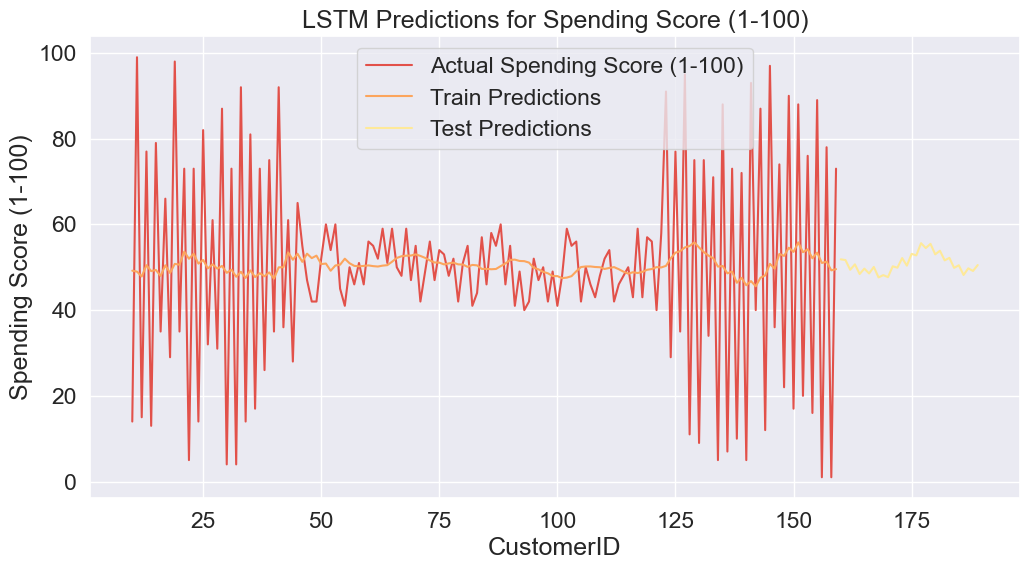

In [25]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
plt.figure(figsize=(12, 6))
plt.plot(df.index[sequence_length:sequence_length + len(train_predictions)], df[feature][sequence_length:sequence_length + len(train_predictions)], label='Actual ' + feature)
plt.plot(df.index[sequence_length:sequence_length + len(train_predictions)], train_predictions, label='Train Predictions')
test_index = df.index[sequence_length + len(train_predictions):sequence_length + len(train_predictions) + len(test_predictions)]
plt.plot(test_index, test_predictions, label='Test Predictions')
plt.xlabel('CustomerID')
plt.ylabel(feature)
plt.title('LSTM Predictions for ' + feature)
plt.legend()
plt.grid(True)
plt.show()